In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_df = pd.read_csv("credit.csv")

In [3]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D25CA2860>,
      dtype=object)

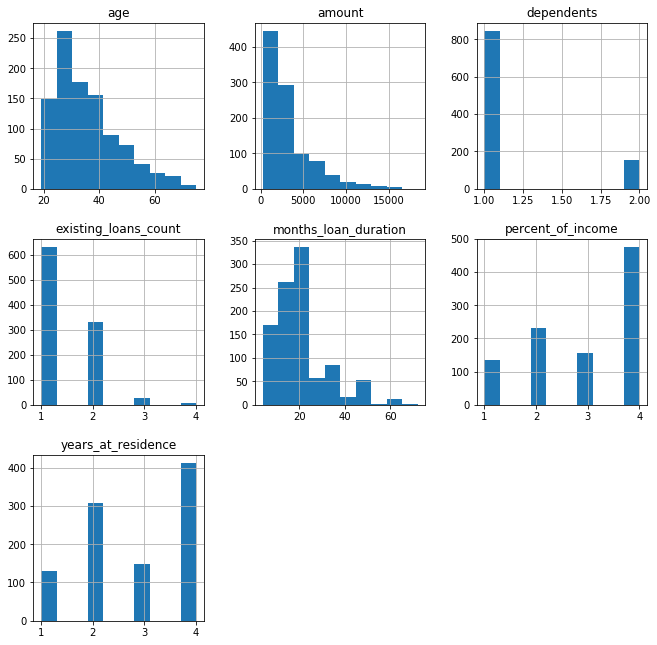

In [4]:
credit_df[credit_df.dtypes[(credit_df.dtypes == "float64") | (credit_df.dtypes == "int64")].index.values].hist(figsize=[11,11])

1. Age - Continuous
2. Amount - Continuous
3. Dependents - Nominal
4. Existing_loan_count - Ordinal
5. months_loan_duration - Continuous
6. percent_of_income - Ordinal
7. years at residence - Ordinal

In [5]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
categorical_feature_columns = list(set(credit_df.columns) - set(credit_df._get_numeric_data().columns))
categorical_feature_columns

['job',
 'credit_history',
 'phone',
 'default',
 'employment_duration',
 'housing',
 'purpose',
 'other_credit',
 'savings_balance',
 'checking_balance']

In [7]:

for i in [a for a in categorical_feature_columns if not a.startswith('default')]:
    print("----------------------------------------")
    print("Value counts for :",i)
    print("----------------------------------------")
    print(credit_df[i].value_counts())

----------------------------------------
Value counts for : job
----------------------------------------
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
----------------------------------------
Value counts for : credit_history
----------------------------------------
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
----------------------------------------
Value counts for : phone
----------------------------------------
no     596
yes    404
Name: phone, dtype: int64
----------------------------------------
Value counts for : employment_duration
----------------------------------------
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
----------------------------------------
Value counts for : housing
----------------------------------------
own      713
rent     179
other    108
Name

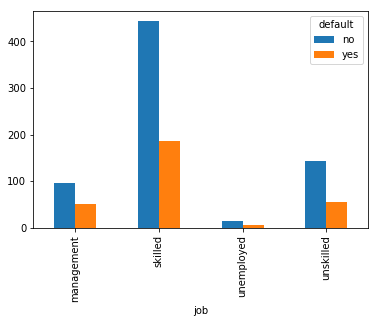

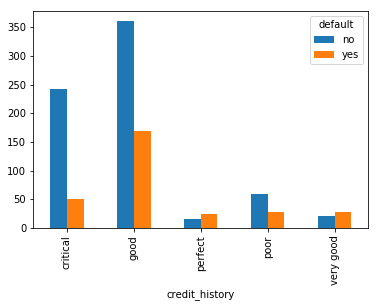

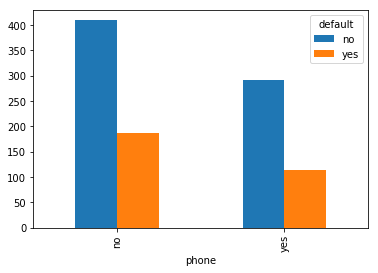

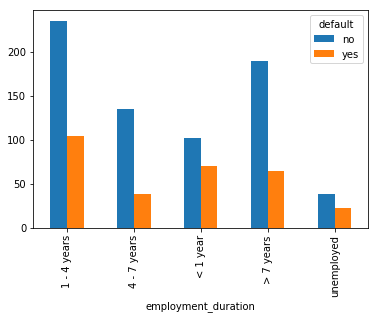

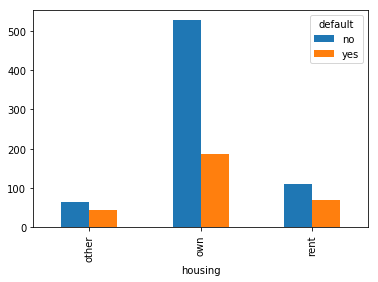

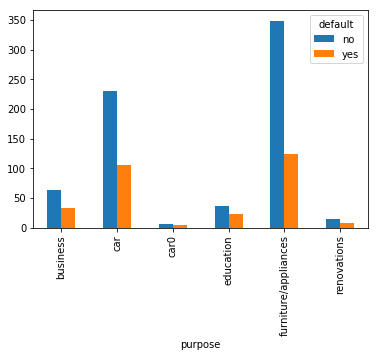

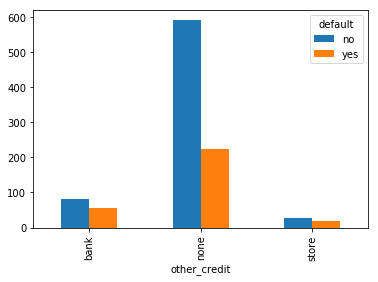

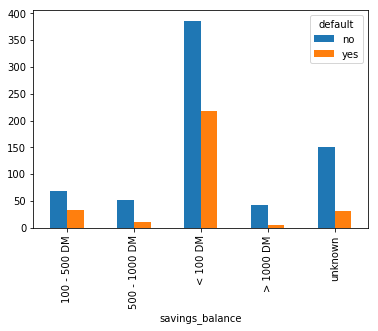

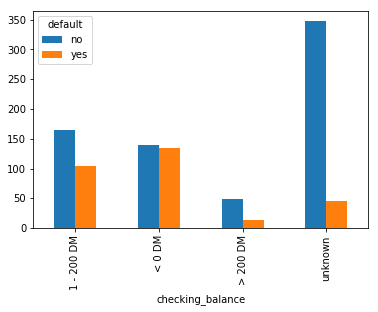

In [8]:
for i in [a for a in categorical_feature_columns if not a.startswith('default')]:
        pd.crosstab(credit_df[i],credit_df.default).plot(kind='bar')

### Stacked Bar Plot

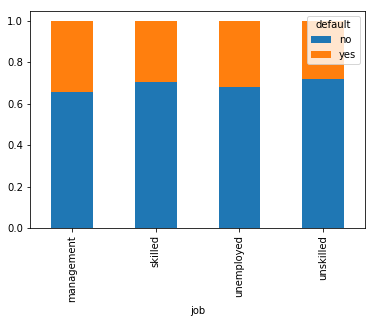

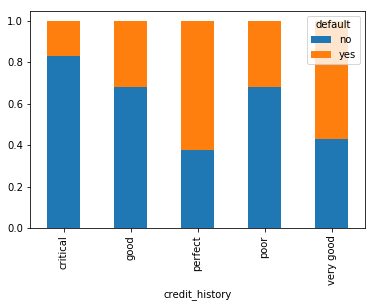

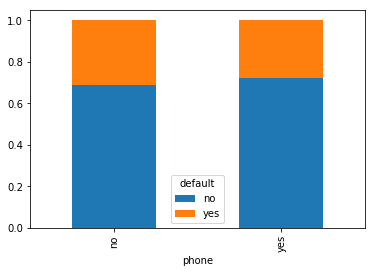

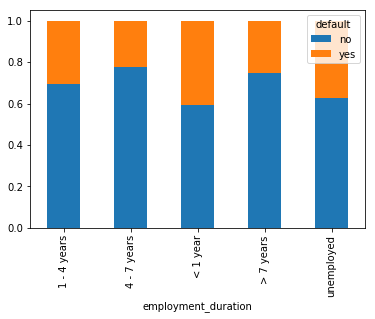

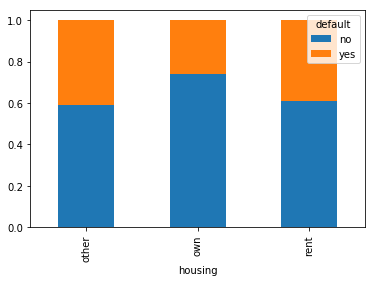

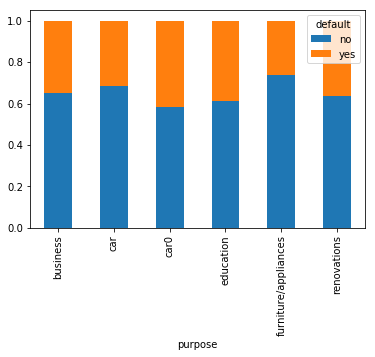

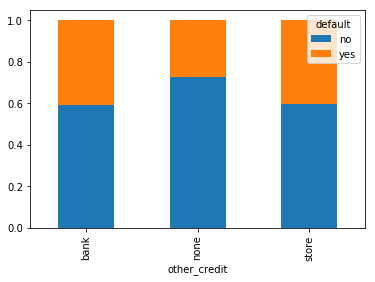

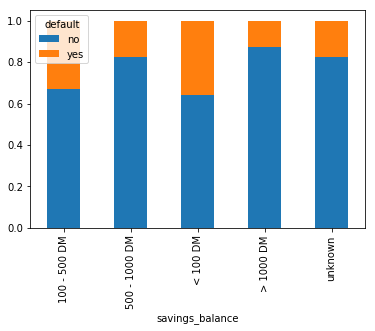

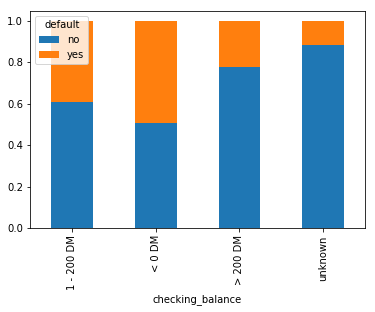

In [9]:
for i in [a for a in categorical_feature_columns if not a.startswith('default')]:
    table=pd.crosstab(credit_df[i],credit_df.default)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

### Chisqaure Test

In [10]:
from scipy.stats import chisquare,chi2_contingency

alpha=0.05
for i in [a for a in categorical_feature_columns if not a.startswith('default')]:
    print("ChiSquare test for: ",i)
    print("----------------------------------------")
    table=pd.crosstab(credit_df[i],credit_df.default)
    chi2,pval,dof,expected = chi2_contingency(table)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    
    
    if pval < alpha:
            result="\n{0} is IMPORTANT for Prediction".format(i)
    else:
            result="\n{0} is NOT an important predictor. (Discard {0} from model)".format(i)

    print(result) 
    print("\n===============================================================================")

ChiSquare test for:  job
----------------------------------------
ChiSquare test statistic:  1.8851560280131707
p-value:  0.5965815918843431

job is NOT an important predictor. (Discard job from model)

ChiSquare test for:  credit_history
----------------------------------------
ChiSquare test statistic:  61.69139696459551
p-value:  1.2791872956750918e-12

credit_history is IMPORTANT for Prediction

ChiSquare test for:  phone
----------------------------------------
ChiSquare test statistic:  1.1725585310208855
p-value:  0.27887615430357426

phone is NOT an important predictor. (Discard phone from model)

ChiSquare test for:  employment_duration
----------------------------------------
ChiSquare test statistic:  18.3682738466968
p-value:  0.001045452349140254

employment_duration is IMPORTANT for Prediction

ChiSquare test for:  housing
----------------------------------------
ChiSquare test statistic:  18.199841582563625
p-value:  0.00011167465374597664

housing is IMPORTANT for Predi

In [11]:
# credit_df["phone"] = pd.Categorical(credit_df["phone"]).codes
# credit_df["default"] = pd.Categorical(credit_df["default"]).codes

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [12]:
target = 'default'
X = credit_df.loc[:, credit_df.columns!=target]
y = credit_df.loc[:, credit_df.columns==target]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
- https://blog.statsbot.co/ensemble-learning-d1dcd548e936
- https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [16]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

In [17]:
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

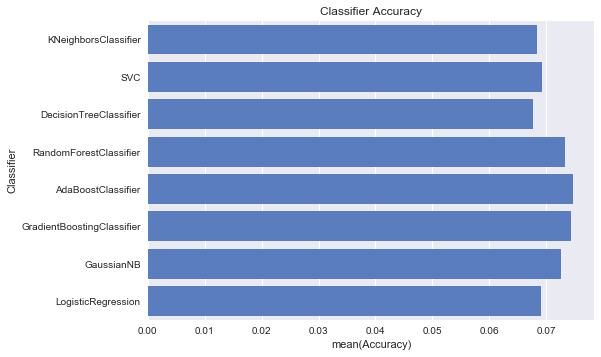

In [18]:
acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [19]:
candidate_classifier = AdaBoostClassifier()
candidate_classifier.fit(X_train, y_train)
result = candidate_classifier.predict(X_test)
acc = accuracy_score(y_test, result)
acc

0.7466666666666667

### Voting Classifier

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
decision_clf1 = DecisionTreeClassifier()
decision_clf2 = DecisionTreeClassifier()

In [21]:
# Hard Voting
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'hard')

voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

In [22]:
# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

In [23]:
print("Hard voting accuracy: %.4f" %(accuracy_hard))
print("Soft voting accuracy: %.4f" %(accuracy_soft))

Hard voting accuracy: 0.6700
Soft voting accuracy: 0.6700


## Bagging

Following are the steps for the bagging meta-estimator algorithm:

1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier()

# Fitting single decision tree
decision_clf.fit(X_train, y_train)
y_pred_decision = decision_clf.predict(X_test)
score_dt = accuracy_score(y_test, y_pred_decision)

In [25]:
# Fitting single Logisitc Regression
log_clf.fit(X_train, y_train)
y_pred_decision = log_clf.predict(X_test)
score_lr = accuracy_score(y_test, y_pred_decision)

Parameters used in the  algorithms:

- base_estimator:
    - It defines the base estimator to fit on random subsets of the dataset.
    - When nothing is specified, the base estimator is a decision tree.
- n_estimators:
    - It is the number of base estimators to be created.
    - The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.
- max_samples:
    - This parameter controls the size of the subsets.
    - It is the maximum number of samples to train each base estimator.
- max_features:
    - Controls the number of features to draw from the whole dataset.
    - It defines the maximum number of features required to train each base estimator.
- n_jobs:
    - The number of jobs to run in parallel.
    - Set this value equal to the cores in your system.
    - If -1, the number of jobs is set to the number of cores.
- random_state:
    - It specifies the method of random split. When random state value is same for two models, the random selection is same for both models.
    - This parameter is useful when you want to compare different models.
 

In [26]:
# Fitting bagging classifier with Logisitc Regression
bagging_clf1 = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf1.fit(X_train, y_train)
y_pred_bagging = bagging_clf1.predict(X_test)
score_bc_lr = accuracy_score(y_test, y_pred_bagging)

In [27]:
# Fitting bagging classifier with Decision Tree
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf2.fit(X_train, y_train)
y_pred_bagging = bagging_clf2.predict(X_test)
score_bc_dt = accuracy_score(y_test, y_pred_bagging)

In [28]:
print("decision tree accuracy %.4f" %(score_dt))
print("bagging classifier (decision tree) accuracy %.4f" %(score_bc_dt))
print("======================================")
print("logistic regression accuracy %.4f" %(score_lr))
print("bagging classifier (logistic regression) accuracy %.4f" %(score_bc_lr))

decision tree accuracy 0.6667
bagging classifier (decision tree) accuracy 0.7333
logistic regression accuracy 0.6900
bagging classifier (logistic regression) accuracy 0.7000


In [29]:
out_of_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                                  n_estimators=100,
                                  max_samples=100,
                                  bootstrap=True,
                                  oob_score=True,
                                  random_state=9)
out_of_bag_clf.fit(X_train, y_train)
y_pred = out_of_bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7333333333333333

### Ensemble without hyperparameter tuning

In [30]:
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)

from sklearn.metrics import accuracy_score

In [31]:
models =[RandomForestClassifier(random_state=77),
          GradientBoostingClassifier(random_state=77),
          AdaBoostClassifier(random_state=77)]

In [32]:
from sklearn.model_selection import cross_val_score, GridSearchCV



for model in models:
    score = cross_val_score(model, X_train, np.ravel(y_train), cv=5)
    msg = ("{0}:\n\tMean accuracy on training set\t= {1:.3f} "
           "(+/- {2:.3f})".format(model.__class__.__name__,
                                  score.mean(),
                                  score.std()))
    print(msg)
    
    # Fit the model on the dev set and predict and eval independent set
    model.fit(X_train, y_train)
    pred_eval = model.predict(X_test)
    acc_eval = accuracy_score(y_test, pred_eval)
    print("\tAccuracy on evaluation set\t\t= {0:.3f}".format(acc_eval))

RandomForestClassifier:
	Mean accuracy on training set	= 0.746 (+/- 0.049)
	Accuracy on evaluation set		= 0.727
GradientBoostingClassifier:
	Mean accuracy on training set	= 0.759 (+/- 0.030)
	Accuracy on evaluation set		= 0.743
AdaBoostClassifier:
	Mean accuracy on training set	= 0.729 (+/- 0.040)
	Accuracy on evaluation set		= 0.747


The models having the lowest standard deviation is  GradientBoostingClassifier, which indicates that the variance of these models is quite low, which is what we're looking for in order to finally obtain a model that can generalize well. Over these three models, the least biased is the GradientBoostingClassifier model as the difference between its training and evaluation sets accuracies is the smallest. The best accuracies over the evaluation set are obtained with AdaBoost and GradientBoosting.

### Hyper parameter tuning

In [33]:
import time
dict_clf = {}

# 1. Random Forest
y_train = np.ravel(y_train)

paramgrid = {
    'n_estimators':      [100, 200, 500, 750, 1000],
    'criterion':         ['gini', 'entropy'],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7))
}

GS = GridSearchCV(RandomForestClassifier(random_state=77),
                  paramgrid,
                  cv=4)

t0 = time.time()
GS.fit(X_train, y_train)
t = time.time() - t0
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_
name = 'RF'
best_clf.fit(X_train, y_train)
acc_eval = accuracy_score(y_test, best_clf.predict(X_test))
dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

In [37]:
# 2. GradientBoosting
paramgrid = {
    'n_estimators':      [100, 200, 500, 750, 1000],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7)),
    'loss' :             ['deviance', 'exponential'],
    'learning_rate':     [0.05, 0.1, 0.2],
}
GS = GridSearchCV(GradientBoostingClassifier(random_state=77),
                  paramgrid,
                  cv=4, n_jobs=-1, verbose=3)
t0 = time.time()
GS.fit(X_train, y_train)
t = time.time() - t0
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_
name = 'GB'
best_clf.fit(X_train, y_train)
acc_eval = accuracy_score(y_test, best_clf.predict(X_test))
dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.7min finished


In [35]:
# 3. AdaBoost
paramgrid = {
    'n_estimators':  [100, 200, 500, 750, 1000],
    'learning_rate': [0.05, 0.1, 0.5, 1, 2]
}
GS = GridSearchCV(AdaBoostClassifier(random_state=77),
                  paramgrid,
                  cv=4)
t0 = time.time()
GS.fit(X_train, y_train)
t = time.time() - t0
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_
name = 'ADB'
best_clf.fit(X_train, y_train)
acc_eval = accuracy_score(y_test, best_clf.predict(X_test))
dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

In [36]:
for clf in dict_clf.keys():
    print("{0} classifier:\n\t- Best score = {1:.2%}".format(clf, dict_clf[clf]['best_score']))
    print("\t- Score on evaluation set = {0:.2%}".format(dict_clf[clf]['score_eval']))
    print("\t- Fitting time = {0:.1f} min".format(round(dict_clf[clf]['fit_time']/60, 1)))
    print("\t- Best parameters:")
    for par in sorted(dict_clf[clf]['best_par'].keys()):
        print("\t\t* {0}: {1}".format(par, dict_clf[clf]['best_par'][par]))

RF classifier:
	- Best score = 76.71%
	- Score on evaluation set = 75.00%
	- Fitting time = 4.8 min
	- Best parameters:
		* criterion: entropy
		* max_features: auto
		* min_samples_leaf: 2
		* n_estimators: 100
GB classifier:
	- Best score = 76.57%
	- Score on evaluation set = 72.67%
	- Fitting time = 5.8 min
	- Best parameters:
		* learning_rate: 0.05
		* loss: deviance
		* max_features: auto
		* min_samples_leaf: 2
		* n_estimators: 200
ADB classifier:
	- Best score = 73.43%
	- Score on evaluation set = 75.00%
	- Fitting time = 1.2 min
	- Best parameters:
		* learning_rate: 0.1
		* n_estimators: 500
